In [2]:
!pip install tensorflow tensorflow-datasets ipywidgets

In [3]:
import tensorflow as tf

In [4]:
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

In [5]:
ds = tfds.load('fashion_mnist', split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.4BFWEU_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.4BFWEU_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


TensorFlow does not return the whole dataset, it return a pipeline by which we can make calls to call batches of data

In [6]:
ds.as_numpy_iterator().next()['label']

2

## Visualize the dataset

In [7]:
# Data Transformation
import numpy as np

In [8]:
# Build a iterator
dataIterator = ds.as_numpy_iterator()

In [9]:
# Bring back new dataset everytime it runs
dataIterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

It is not loading whole data but making calls to get batch of data which hepls to preserve our machine memory

In [10]:
dataIterator.next()['image'].shape

(28, 28, 1)

In [11]:
np.squeeze(dataIterator.next()['image']).shape

(28, 28)

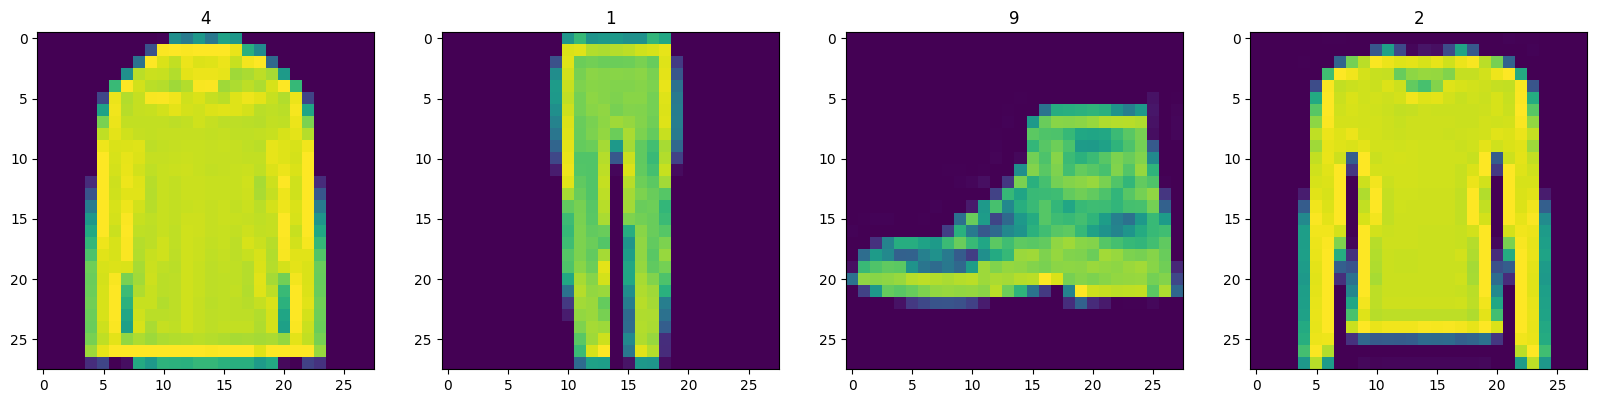

In [12]:
# Create Subplots
# Setup format of subplots
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# Loop 4 times to get images
for idx in range(4):
    # Grab image and label
    sample = dataIterator.next()
    # Plot image of specfic subplot
    ax[idx].imshow(np.squeeze(sample['image']))
    # Image label as title
    ax[idx].title.set_text(sample['label'])

In [13]:
# Scale images Only
def scale_images(data):
    image = data['image']
    return image / 255

In [14]:
# map -> cache -> shuffle -> batch -> prefetch
# to build data pipeline for tensor flow

# Reload Dataset
ds = tfds.load('fashion_mnist', split='train')
# Running the dataset through scale_images function 
ds = ds.map(scale_images)
# Cache the dataset for that batch
ds = ds.cache()
# Shuffle 
ds = ds.shuffle(60000)
# BAtch into 128 images per sample
ds = ds.batch(128)
# Eleminates(Redeuce) bottlenecking
ds = ds.prefetch(64)

In [15]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

# Build Neural Network 

Import Modelling Components

In [16]:
# Bring Sequential API for generator and discriminator
from tensorflow.keras.models import Sequential
# Import Layers for neural network
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

Build Generator

In [17]:
def build_generator():
    model = Sequential()

    # Input 128 images to tell what to generate and it will generate randomly
    # Reshapes random values to 7x7x128 -- Beginning of generated image
    # 128 (input dims) latent space
    model.add(Dense(7*7*128, input_dim=128))
    # Introduce Non-Linearity
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))

    # Upsampling Block 1
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))

    # Upsampling Block 2
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))

    # Convolutional block 1
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))

    # Convolutional block 2
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))

    # Conv layer to get to one channel
    model.add(Conv2D(1, 4, padding='same', activation='sigmoid'))

    return model

In [18]:
generator = build_generator()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
generator.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6272)                │         809,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 14, 14, 128)         │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 128)         │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 1)           │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,155,137 (8.22 MB)

 Trainable params: 2,155,137 (8.22 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


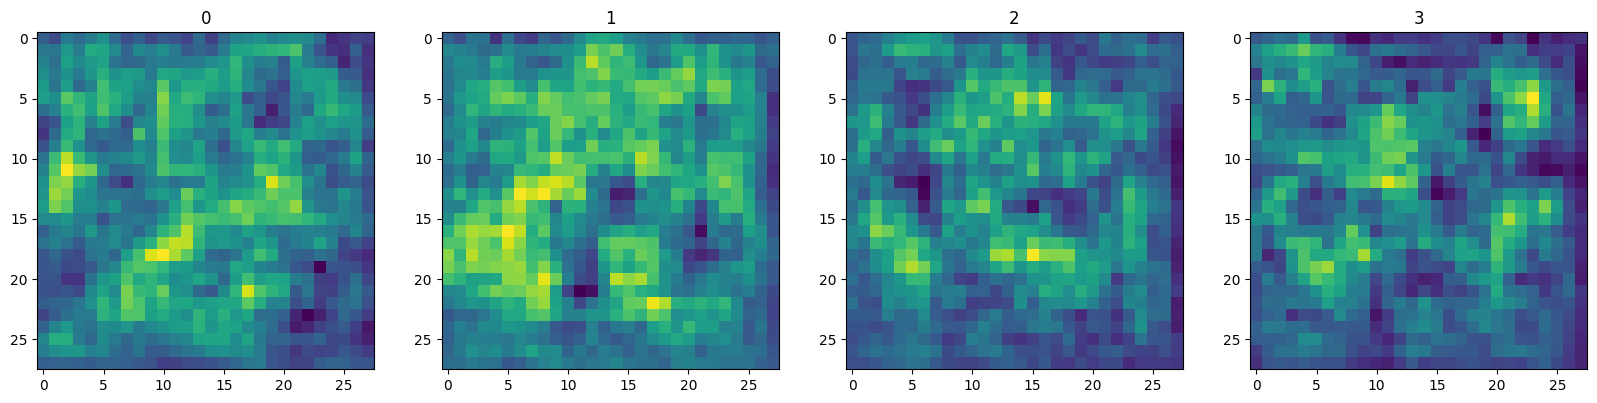

In [20]:
# Generate new images
img = generator.predict(np.random.randn(4,128,1))
# Create Subplots
# Setup format of subplots
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(img):
    # Plot image of specfic subplot
    ax[idx].imshow(np.squeeze(img))
    # Image label as title
    ax[idx].title.set_text(idx)

Build Discriminator

In [21]:
def build_discriminator():
    model = Sequential()

    # First Conv Block
    model.add(Conv2D(32, 5, input_shape = (28,28,1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Second Conv Block
    model.add(Conv2D(64, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Third Conv Block
    model.add(Conv2D(128, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Fourth Conv Block
    model.add(Conv2D(256, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Flatten and pass through dense layer
    model.add(Flatten())
    model.add(Dropout(0.4))
    # 1 - Fake 0 - Real
    model.add(Dense(1, activation='sigmoid'))

    return model


In [22]:
discriminator = build_discriminator()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
discriminator.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 24, 24, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 20, 20, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 12, 12, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_8 (LeakyReLU)            │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │          36,865 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,113,345 (4.25 MB)

 Trainable params: 1,113,345 (4.25 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
img = generator.predict(np.random.randn(4,128,1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [25]:
img.shape

(4, 28, 28, 1)

In [26]:
# discriminator.predict(generator.predict(np.random.randn(4,128,1)))
discriminator.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


array([[0.51564455],
       [0.51544124],
       [0.5154284 ],
       [0.51556844]], dtype=float32)

# Construct Training Loop

Setup losses and optimisers

In [27]:
# Optimiser for both
from tensorflow.keras.optimizers import Adam
# loss for both
from tensorflow.keras.losses import BinaryCrossentropy

In [28]:
g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.00001)

g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

Build Subclassed Model

In [29]:
# Importing base model class to subclass our training set
from tensorflow.keras.models import Model

In [30]:
class FashionGAN(Model):
    def __init__(self, generator, discriminator, *args, **kwargs):
        # Pass through args and kwargs to base class
        super().__init__(*args, **kwargs)

        # Create attributes for generator and discriminator
        self.generator = generator
        self.discriminator = discriminator
    
    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
        #Compile with base class
        super().compile(*args, **kwargs)

        # Create attributes for losses and optimisers
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss
        
    def train_step(self, batch):
        # Get the data
        real_images = batch
        fake_images = self.generator(tf.random.normal((128,128,1)),training=False)# not training only making predictions

        # Train the discriminator
        with tf.GradientTape() as d_tape:

            # Pass real anf fake images throug Discriminator model
            yhat_real = self.discriminator(real_images, training=True)
            yhat_fake = self.discriminator(fake_images, training=True) 
            yhat_realfake = tf.concat([yhat_real,yhat_fake],axis=0)

            # Create labels for real and fake images
            y_realfake = tf.concat([tf.zeros_like(yhat_real),tf.ones_like(yhat_fake)], axis=0)

            # Add some noise to TRUE outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake],axis=0)

            # Calculate loss
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)

        # Apply Backpropagation
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))

        # Train the generator
        with tf.GradientTape() as g_tape:
            # Generate some new images
            gen_images = self.generator(tf.random.normal((128,128,1)), training=True)

            # Create the predicted labels
            predicted_labels = self.discriminator(gen_images, training=False)

            # Calculate loss - trick to traing to fake out the discriminator
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels),predicted_labels)
        # Apply BackPropogation
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))

        return {"d_loss":total_d_loss, "g_loss":total_g_loss}

In [31]:
# Create instance of subclassed model
fashgan = FashionGAN(generator, discriminator)

In [32]:
# Compile
fashgan.compile(g_opt, d_opt, g_loss, d_loss)

Build CallBack

In [33]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [34]:
# Save examples of our generated images as we training
class ModelMonitor(Callback):
    def __init__(self, num_img = 3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('/kaggle/working/images',f'generated_img_{epoch}_{i}.png'))



4.3 Train

In [35]:
 from pathlib import Path
 Path('/kaggle/working/images').mkdir(parents=True, exist_ok=True)

In [36]:
# Recommend 2000
hist = fashgan.fit(ds, epochs=50, callbacks=[ModelMonitor()])

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 138ms/step - d_loss: 0.6035 - g_loss: 0.9984
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 119ms/step - d_loss: 0.5106 - g_loss: 1.0664
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 119ms/step - d_loss: 0.7032 - g_loss: 0.7062
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 119ms/step - d_loss: 0.6888 - g_loss: 0.7033
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 118ms/step - d_loss: 0.6948 - g_loss: 0.6656
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 55s 118ms/step - d_loss: 0.6944 - g_loss: 0.6702
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 55s 118ms/step - d_loss: 0.6934 - g_loss: 0.6632
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 55s 118ms/step - d_loss: 0.6932 - g_loss: 0.6588
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 118ms/step - d_loss: 0.3599 - g_loss: 2.2654
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 119ms/step - d_loss: 0.2741 - g_loss: 2.6742
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 118ms/step - d_loss: 0.2716 - g_loss: 2.6638
Epoch 12/50
469/469

# Test Out Generator

Generate image

In [37]:
imgs = generator.predict(tf.random.normal((16,128,1)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 685ms/step


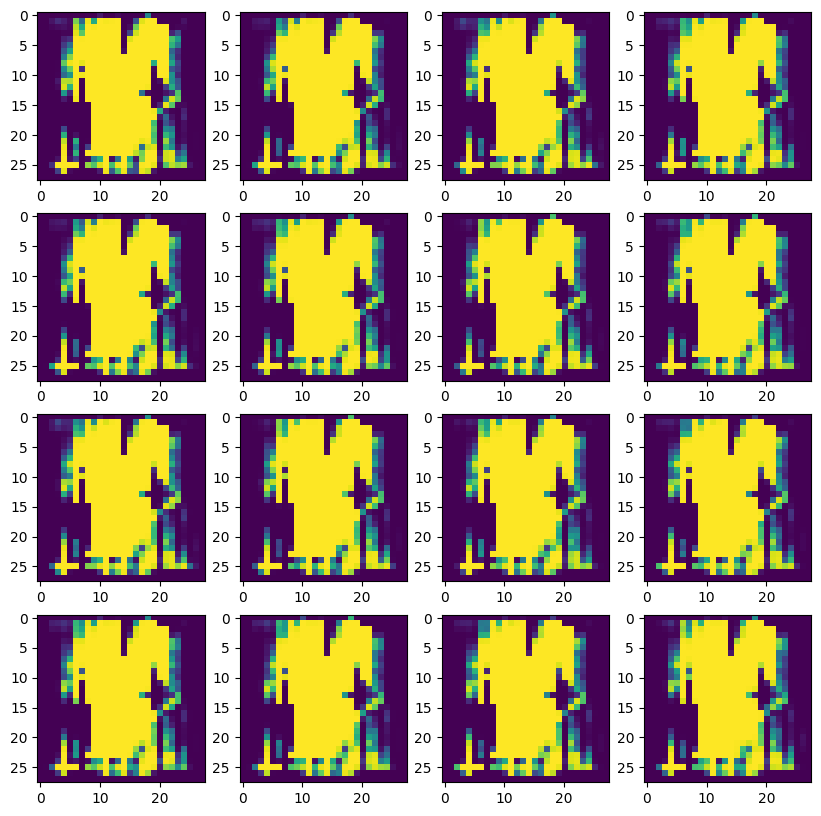

In [38]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(10,10))
for r in range(4): 
    for c in range(4): 
        ax[r][c].imshow(imgs[(r+1)*(c+1)-1])

In [40]:
generator.save('generator.h5')




discriminator.save('discriminator.h5')